# Test farfield calculations

We carry out a simple test to check the farfield calculations.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from PyPO.System import System
from PyPO.Enums import FieldComponents, Units, Scales

In [2]:
s = System()

2026-02-27 15:54:48 - WARNING - System override set to True. 


We set up a simple uniform source on a disk, and propagate that to the farfield.

In [3]:
# Setting up parameters for defining simulation.
# Source parameters and distances
lam = 0.1*Units.MM                # Wavelength of light in mm
r_disk = 5*Units.MM               # Radius of disk in mm


In [4]:
# Setting up surface dictionaries and source current distributions.
disk = {
        "name"      : "disk",
        "gmode"     : "uv",
        "lims_u"    : np.array([0, r_disk]),
        "lims_v"    : np.array([0, 360])*Units.DEG,
        "gridsize"  : np.array([201, 180])
        }

s.addPlane(disk)

udict = {                         
            "name"      : "source",                                                                                                                                  
            "lam"       : 1*Units.MM,                                                                                                                                                                                                                                                                                                                            
            "E0"        : 1,                                                                                                                                  
            "dxyz"      : 0,                                                                                                 
            "pol"       : np.array([1, 0, 0])
}                                                                                                          

s.createUniformSource(udict, "disk")
#s.createGaussian(GPODict, "disk")

2026-02-27 15:54:48 - INFO - Added plane disk to system. 


In [5]:
# Set up the farfield grid

size = 20

farfield = {
            "name"      : "farfield",
            "gmode"     : "AoE",
            "lims_Az"    : np.array([-size, size])*Units.DEG,
            "lims_El"    : np.array([-size, size])*Units.DEG,
            "gridsize"  : np.array([101, 101])
            }

s.addPlane(farfield)

2026-02-27 15:54:48 - INFO - Added plane farfield to system. 


In [6]:
pri_to_ff = {
        "t_name"    : "farfield",
        "s_current" : "source",
        "mode"      : "FF",
        "name_EH"   : "EH_ff",
        "device"    : "GPU"
        }

s.runPO(pri_to_ff)

2026-02-27 15:54:48 - WORK - *** Starting PO propagation *** 
2026-02-27 15:54:48 - WORK - Propagating source on disk to farfield, propagation mode: FF. 
2026-02-27 15:54:48 - WORK - Hardware: running 256 CUDA threads per block. 
2026-02-27 15:54:48 - WORK - ... Calculating ... 
2026-02-27 15:54:49 - WORK - *** Finished: 0.714 seconds *** 


Units.MM
mm


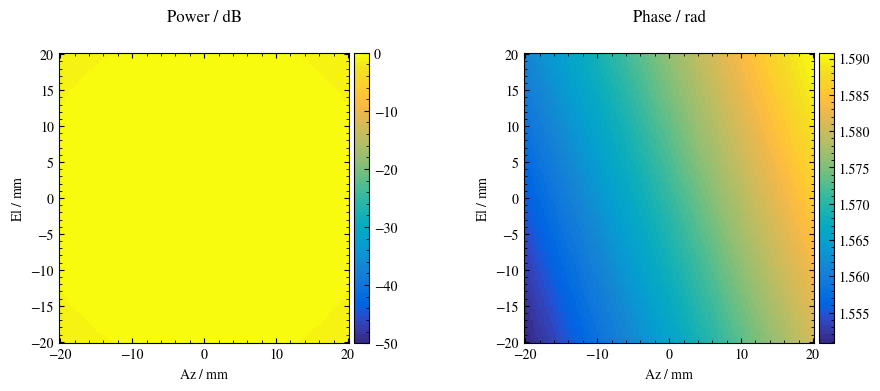

Units.MM
mm


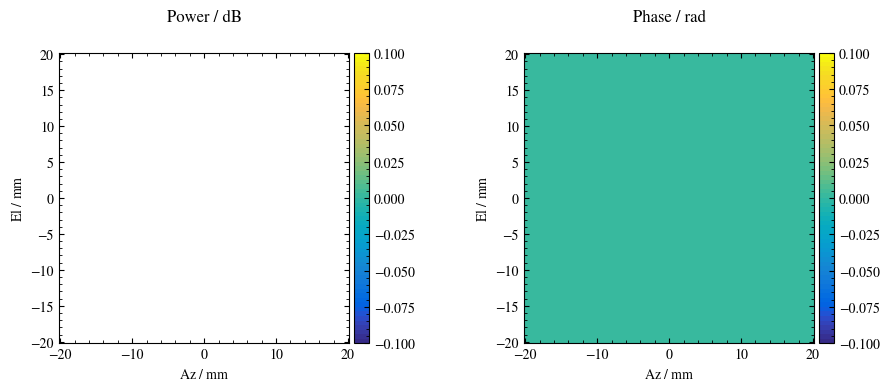

Units.MM
mm


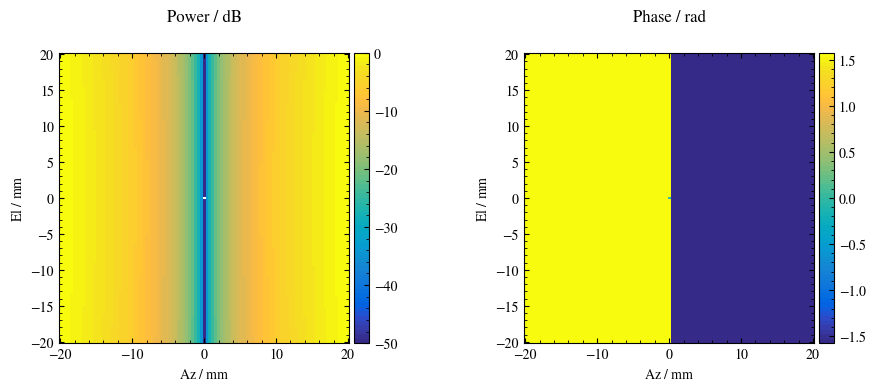

In [7]:
s.plotBeam2D("EH_ff", FieldComponents.Ex, vmin=-50)
s.plotBeam2D("EH_ff", FieldComponents.Ey, vmin=-50)
s.plotBeam2D("EH_ff", FieldComponents.Ez, vmin=-50)

Units.MM
mm


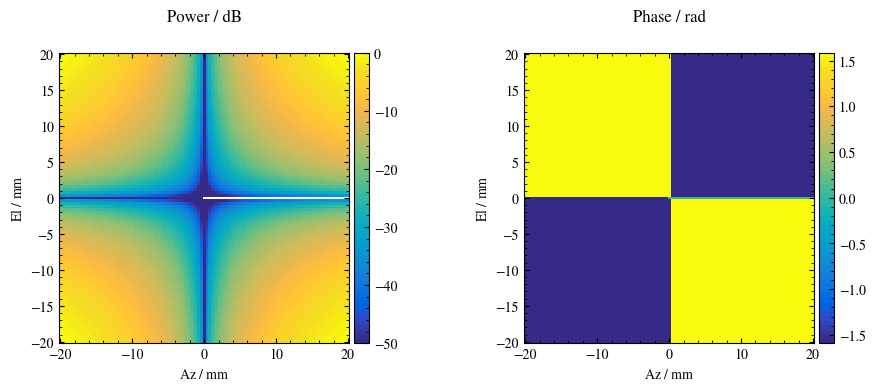

Units.MM
mm


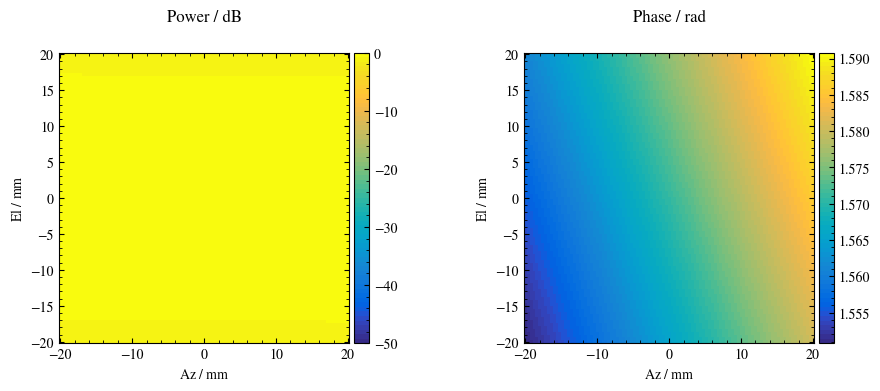

Units.MM
mm


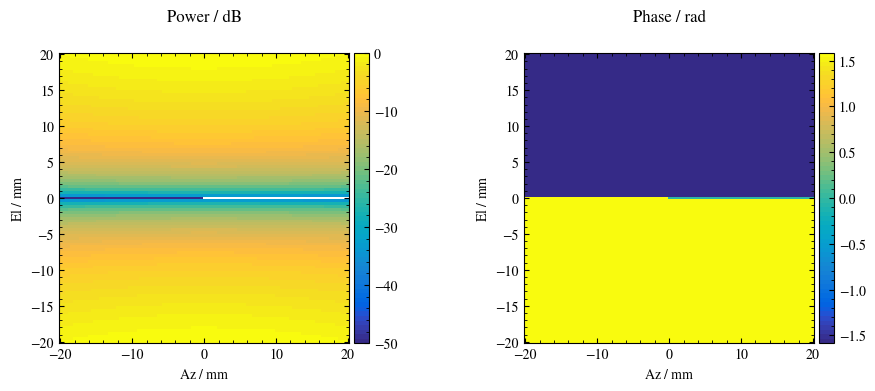

In [8]:
s.plotBeam2D("EH_ff", FieldComponents.Hx, vmin=-50, norm=False)
s.plotBeam2D("EH_ff", FieldComponents.Hy, vmin=-50)
s.plotBeam2D("EH_ff", FieldComponents.Hz, vmin=-50)

In [10]:
grid = s.generateGrids("farfield")

Text(0, 0.5, 'Phase (rad)')

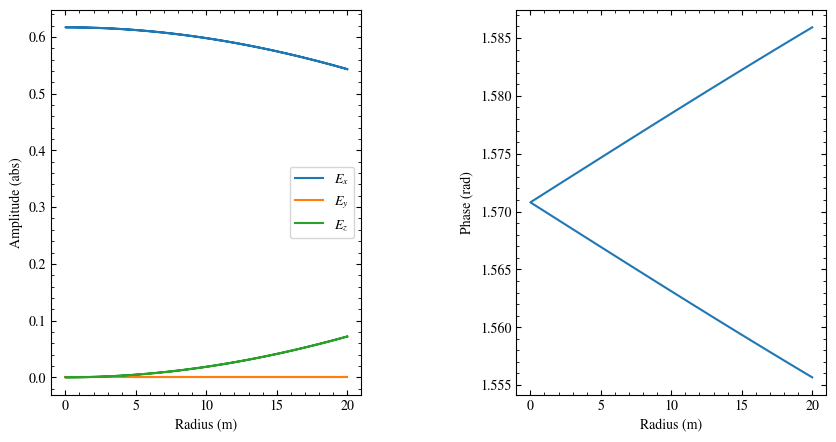

In [11]:
field = 'EH_ff'

row = 50

fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'wspace':0.5})
ax[0].plot(np.rad2deg(grid.x[:,row]), np.abs(s.fields[field].Ex[:,row])**2, label='$E_x$')
ax[0].plot(np.rad2deg(grid.x[:,row]), np.abs(s.fields[field].Ey[:,row])**2, label='$E_y$')
ax[0].plot(np.rad2deg(grid.x[:,row]), np.abs(s.fields[field].Ez[:,row])**2, label='$E_z$')
ax[0].legend()
ax[0].set_xlabel('Radius (m)')
ax[0].set_ylabel('Amplitude (abs)')

ax[1].plot(np.rad2deg(grid.x[:,row]), np.unwrap(np.angle(s.fields[field].Ex[:,row])))
ax[1].set_xlabel('Radius (m)')
ax[1].set_ylabel('Phase (rad)')

Text(0, 0.5, 'Phase (rad)')

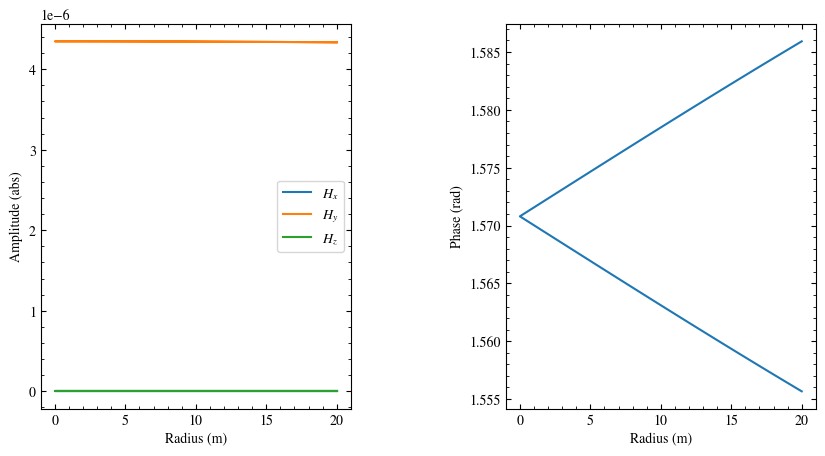

In [12]:
fig, ax = plt.subplots(1,2, figsize=(10,5), gridspec_kw={'wspace':0.5})
ax[0].plot(np.rad2deg(grid.x[:,row]), np.abs(s.fields[field].Hx[:,row])**2, label='$H_x$')
ax[0].plot(np.rad2deg(grid.x[:,row]), np.abs(s.fields[field].Hy[:,row])**2, label='$H_y$')
ax[0].plot(np.rad2deg(grid.x[:,row]), np.abs(s.fields[field].Hz[:,row])**2, label='$H_z$')
ax[0].legend()
ax[0].set_xlabel('Radius (m)')
ax[0].set_ylabel('Amplitude (abs)')

ax[1].plot(np.rad2deg(grid.x[:,row]), np.unwrap(np.angle(s.fields[field].Hy[:,row])))
ax[1].set_xlabel('Radius (m)')
ax[1].set_ylabel('Phase (rad)')